In [1]:
# load Article_top_Data.csv
import pandas as pd
import numpy as np

df = pd.read_csv('Article_top_Data.csv', index_col=False)
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,0,9,Milch
1,6,2022-01-03,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,2022-01-03 09:21:14,1,0,9,Pfandartikel
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
4,20,2022-01-03,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST


In [2]:
# frequency for each group
print(df.shape[0])
df.Group.value_counts()

4905502


Pfandartikel                2817389
Broetchen                    273557
Gurken ST                    250097
Bananen Lose                 243947
Milch                        235738
BO-Laugenbreze 1ST           161895
Schlaufentragetasche ST      144543
Zeitschriften 7%             128550
VL Eier BH 10ST              115597
GL Sahne 30% 200g VLOG       114276
M.I. Mozzarella oGt 125g     113437
Avocado vorgereift ST        103573
SammelNr. Lose Backwaren      79041
Kiwi Gruen ST                 62747
AugustinerHellMW1x0,5LFL      61115
Name: Group, dtype: int64

In [3]:
df = df.drop_duplicates(subset=['Date','StoreNumber', 'CashRegisterNumber', 'ReceiptNumber', 'Group'], keep='first')
display(df.head())
display(df.shape)
df.Group.value_counts()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,0,9,Milch
1,6,2022-01-03,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,2022-01-03 09:21:14,1,0,9,Pfandartikel
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
5,42,2022-01-03,1001,1,302,17,09:26:38,40421,Avocado vorgereift ST,1.0,2022-01-03 09:26:38,1,0,9,Avocado vorgereift ST


(2967617, 15)

Pfandartikel                1391044
Bananen Lose                 239104
Gurken ST                    215045
Broetchen                    191877
Milch                        140315
BO-Laugenbreze 1ST           127919
Schlaufentragetasche ST      127268
VL Eier BH 10ST               97537
Zeitschriften 7%              96687
Avocado vorgereift ST         83477
GL Sahne 30% 200g VLOG        71804
M.I. Mozzarella oGt 125g      66269
SammelNr. Lose Backwaren      49962
Kiwi Gruen ST                 38797
AugustinerHellMW1x0,5LFL      30512
Name: Group, dtype: int64

In [4]:
# drop articles with overwhelming quantity
df.drop(df[df.Group == "Pfandartikel"].index, inplace=True)
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,0,9,Milch
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
5,42,2022-01-03,1001,1,302,17,09:26:38,40421,Avocado vorgereift ST,1.0,2022-01-03 09:26:38,1,0,9,Avocado vorgereift ST
6,45,2022-01-03,1001,1,303,3,09:27:38,408307,VL Eier BH 10ST,1.0,2022-01-03 09:27:38,1,0,9,VL Eier BH 10ST


# General, without separation

In [5]:
# integrate the identical transactions
integrated = df.groupby(['Date','StoreNumber', 'CashRegisterNumber', 'ReceiptNumber']).agg(Articles=('Group', lambda x:';'.join(x.unique()))).reset_index()
display(integrated.head())

# spilt the integrated transactions into several columns
split_1 = integrated['Articles'].str.split(';', expand=True).dropna(how='all', axis=1)
display(split_1.head())

for i in range(split_1.shape[1]):
    mini_article = split_1[split_1.iloc[:,i].notnull()]
    print(f"Transactions contain at least {i+1} article and the frequency is {mini_article.shape[0]}")

# filter transactions with at least 4 articles
split_1 = split_1[split_1.iloc[:,3].notnull()]
display(split_1.head())

# convert DataFrame to List
# delete the NoneType
res = []
def filter_list(_list):
    for item in _list:
        res.append(list(filter(None, item)))
filter_list(split_1.values.tolist())

transactions_from_df = [tuple(row) for row in res]
transactions_from_df[0:3]

# apriori algorithm
from efficient_apriori import apriori
itemsets, rules = apriori(transactions_from_df, min_support=0.25, min_confidence=0.5)
print("itemsets:",itemsets)
print("rules", rules)

,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,Articles
0,2022-01-03,1001,1,296,Milch;Schlaufentragetasche ST
1,2022-01-03,1001,1,300,BO-Laugenbreze 1ST
2,2022-01-03,1001,1,302,Avocado vorgereift ST
3,2022-01-03,1001,1,303,VL Eier BH 10ST
4,2022-01-03,1001,1,306,Milch


,0,1,2,3,4,5,6,7
0,Milch,Schlaufentragetasche ST,None,None,None,None,None,None
1,BO-Laugenbreze 1ST,None,None,None,None,None,None,None
2,Avocado vorgereift ST,None,None,None,None,None,None,None
3,VL Eier BH 10ST,None,None,None,None,None,None,None
4,Milch,None,None,None,None,None,None,None


Transactions contain at least 1 article and the frequency is 1179217
Transactions contain at least 2 article and the frequency is 305242
Transactions contain at least 3 article and the frequency is 72821
Transactions contain at least 4 article and the frequency is 15754
Transactions contain at least 5 article and the frequency is 2994
Transactions contain at least 6 article and the frequency is 468
Transactions contain at least 7 article and the frequency is 68
Transactions contain at least 8 article and the frequency is 9


,0,1,2,3,4,5,6,7
7,Gurken ST,Avocado vorgereift ST,VL Eier BH 10ST,Broetchen,GL Sahne 30% 200g VLOG,None,None,None
22,Milch,Avocado vorgereift ST,Gurken ST,Bananen Lose,None,None,None,None
62,Schlaufentragetasche ST,VL Eier BH 10ST,Broetchen,Avocado vorgereift ST,None,None,None,None
232,Bananen Lose,Gurken ST,GL Sahne 30% 200g VLOG,Avocado vorgereift ST,None,None,None,None
311,Milch,M.I. Mozzarella oGt 125g,Avocado vorgereift ST,Kiwi Gruen ST,Gurken ST,None,None,None


itemsets: {1: {('Gurken ST',): 10442, ('Avocado vorgereift ST',): 3983, ('VL Eier BH 10ST ',): 6402, ('Broetchen',): 5817, ('GL Sahne 30% 200g VLOG',): 4447, ('Milch',): 7543, ('Bananen Lose',): 9947, ('M.I. Mozzarella oGt 125g',): 4268}, 2: {('Bananen Lose', 'Gurken ST'): 6326, ('Bananen Lose', 'Milch'): 4404, ('Gurken ST', 'Milch'): 4580, ('Gurken ST', 'VL Eier BH 10ST '): 4031}}
rules [{Gurken ST} -> {Bananen Lose}, {Bananen Lose} -> {Gurken ST}, {Milch} -> {Bananen Lose}, {Milch} -> {Gurken ST}, {VL Eier BH 10ST } -> {Gurken ST}]


# Separation

In [6]:
# separate the rest articles into similar frequencies
fre_1 = df[df.Group.isin(df.Group.value_counts()[:6].index.to_list())]
fre_2 = df[df.Group.isin(df.Group.value_counts()[6:].index.to_list())]
display(fre_1.Group.unique(),fre_2.Group.unique())
display(fre_1.head(), fre_2.head())

array(['Milch', 'Schlaufentragetasche ST', 'BO-Laugenbreze 1ST',
       'Gurken ST', 'Broetchen', 'Bananen Lose'], dtype=object)

array(['Avocado vorgereift ST', 'VL Eier BH 10ST ',
       'M.I. Mozzarella oGt 125g', 'GL Sahne 30% 200g VLOG',
       'Zeitschriften 7%', 'Kiwi Gruen ST', 'AugustinerHellMW1x0,5LFL',
       'SammelNr. Lose Backwaren'], dtype=object)

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,0,9,Milch
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
8,78,2022-01-03,1001,1,306,1,09:32:07,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:32:07,1,0,9,Milch
9,92,2022-01-03,1001,1,307,1,09:35:19,419726,"GL H-Milch1,5%1L VLOG",10.0,2022-01-03 09:35:19,1,0,9,Milch


,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
5,42,2022-01-03,1001,1,302,17,09:26:38,40421,Avocado vorgereift ST,1.0,2022-01-03 09:26:38,1,0,9,Avocado vorgereift ST
6,45,2022-01-03,1001,1,303,3,09:27:38,408307,VL Eier BH 10ST,1.0,2022-01-03 09:27:38,1,0,9,VL Eier BH 10ST
12,108,2022-01-03,1001,2,2,7,16:04:30,406966,M.I. Mozzarella oGt 125g,1.0,2022-01-03 16:04:30,1,0,16,M.I. Mozzarella oGt 125g
17,124,2022-01-03,1001,2,4,7,16:06:31,40421,Avocado vorgereift ST,2.0,2022-01-03 16:06:31,1,0,16,Avocado vorgereift ST
18,132,2022-01-03,1001,2,4,15,16:06:31,408307,VL Eier BH 10ST,1.0,2022-01-03 16:06:31,1,0,16,VL Eier BH 10ST


## first cluster

In [7]:
# integrate the identical transactions
integrated_1 = fre_1.groupby(['Date','StoreNumber', 'CashRegisterNumber', 'ReceiptNumber']).agg(Articles=('Group', lambda x:';'.join(x.unique()))).reset_index()
display(integrated_1.head())

# spilt the integrated transactions into several columns
split_1 = integrated_1['Articles'].str.split(';', expand=True).dropna(how='all', axis=1)
display(split_1.head())

for i in range(split_1.shape[1]):
    mini_article = split_1[split_1.iloc[:,i].notnull()]
    print(f"Transactions contain at least {i+1} article and the frequency is {mini_article.shape[0]}")

# filter transactions with at least 3 articles
split_1 = split_1[split_1.iloc[:,2].notnull()]
display(split_1.head())

# convert DataFrame to List
# delete the NoneType
res = []
def filter_list(_list):
    for item in _list:
        res.append(list(filter(None, item)))
filter_list(split_1.values.tolist())

transactions_from_df = [tuple(row) for row in res]
transactions_from_df[0:3]

# apriori algorithm
from efficient_apriori import apriori
itemsets, rules = apriori(transactions_from_df, min_support=0.25, min_confidence=0.5)
print("itemsets:",itemsets)
print("rules", rules)

,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,Articles
0,2022-01-03,1001,1,296,Milch;Schlaufentragetasche ST
1,2022-01-03,1001,1,300,BO-Laugenbreze 1ST
2,2022-01-03,1001,1,306,Milch
3,2022-01-03,1001,1,307,Milch
4,2022-01-03,1001,2,2,Milch


,0,1,2,3,4,5
0,Milch,Schlaufentragetasche ST,None,None,None,None
1,BO-Laugenbreze 1ST,None,None,None,None,None
2,Milch,None,None,None,None,None
3,Milch,None,None,None,None,None
4,Milch,None,None,None,None,None


Transactions contain at least 1 article and the frequency is 865311
Transactions contain at least 2 article and the frequency is 153201
Transactions contain at least 3 article and the frequency is 20804
Transactions contain at least 4 article and the frequency is 2083
Transactions contain at least 5 article and the frequency is 125
Transactions contain at least 6 article and the frequency is 4


,0,1,2,3,4,5
18,Milch,Gurken ST,Bananen Lose,None,None,None
51,Milch,BO-Laugenbreze 1ST,Broetchen,None,None,None
77,Schlaufentragetasche ST,Gurken ST,Bananen Lose,None,None,None
280,Gurken ST,Bananen Lose,Broetchen,None,None,None
323,Bananen Lose,Broetchen,BO-Laugenbreze 1ST,None,None,None


itemsets: {1: {('Milch',): 10986, ('Gurken ST',): 13849, ('Bananen Lose',): 14060, ('BO-Laugenbreze 1ST',): 7724, ('Broetchen',): 11729, ('Schlaufentragetasche ST',): 6276}, 2: {('Bananen Lose', 'Broetchen'): 6499, ('Bananen Lose', 'Gurken ST'): 9143, ('Bananen Lose', 'Milch'): 7059, ('Broetchen', 'Gurken ST'): 6275, ('Gurken ST', 'Milch'): 6916}}
rules [{Broetchen} -> {Bananen Lose}, {Gurken ST} -> {Bananen Lose}, {Bananen Lose} -> {Gurken ST}, {Milch} -> {Bananen Lose}, {Bananen Lose} -> {Milch}, {Broetchen} -> {Gurken ST}, {Milch} -> {Gurken ST}]


## Analysis on the first-cluster articles that are not showed in the rule associations

In [8]:
counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "Schlaufentragetasche ST"].shape[0]
print("Schlaufentragetasche ST", counts)

counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "BO-Laugenbreze 1ST"].shape[0]
print("BO-Laugenbreze 1ST", counts)

counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "Milch"].shape[0]
print("Milch", counts)

counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "Broetchen"].shape[0]
print("Broetchen", counts)

counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "Bananen Lose"].shape[0]
print("Bananen Lose", counts)

counts = 0
for i in range(5):
    counts += split_1[split_1.iloc[:,i] == "Gurken ST"].shape[0]
print("Gurken ST", counts)

Schlaufentragetasche ST 6276
BO-Laugenbreze 1ST 7723
Milch 10985
Broetchen 11728
Bananen Lose 14059
Gurken ST 13849


In [9]:
display(integrated_1.head())
print("Schlaufentragetasche ST:", integrated_1[integrated_1.Articles.str.contains("Schlaufentragetasche ST")].shape[0], integrated_1[integrated_1.Articles == "Schlaufentragetasche ST"].shape[0])
print("BO-Laugenbreze 1ST:", integrated_1[integrated_1.Articles.str.contains("BO-Laugenbreze 1ST")].shape[0],integrated_1[integrated_1.Articles == "BO-Laugenbreze 1ST"].shape[0])
print("Milch:", integrated_1[integrated_1.Articles.str.contains("Milch")].shape[0], integrated_1[integrated_1.Articles == "Milch"].shape[0])
print("Broetchen:", integrated_1[integrated_1.Articles.str.contains("Broetchen")].shape[0],integrated_1[integrated_1.Articles == "Broetchen"].shape[0])
print("Bananen Lose:", integrated_1[integrated_1.Articles.str.contains("Bananen Lose")].shape[0], integrated_1[integrated_1.Articles == "Bananen Lose"].shape[0])
print("Gurken ST:", integrated_1[integrated_1.Articles.str.contains("Gurken ST")].shape[0], integrated_1[integrated_1.Articles == "Gurken ST"].shape[0])

,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,Articles
0,2022-01-03,1001,1,296,Milch;Schlaufentragetasche ST
1,2022-01-03,1001,1,300,BO-Laugenbreze 1ST
2,2022-01-03,1001,1,306,Milch
3,2022-01-03,1001,1,307,Milch
4,2022-01-03,1001,2,2,Milch


Schlaufentragetasche ST: 127268 93307
BO-Laugenbreze 1ST: 127919 89127
Milch: 140315 91422
Broetchen: 191877 131249
Bananen Lose: 239104 163168
Gurken ST: 215045 143837


/Users/ken/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


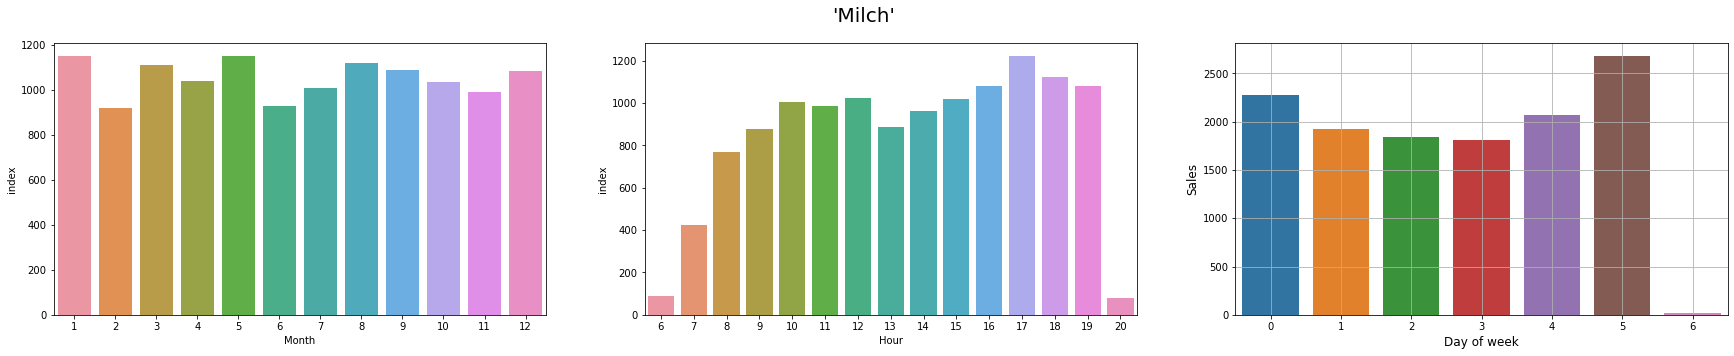

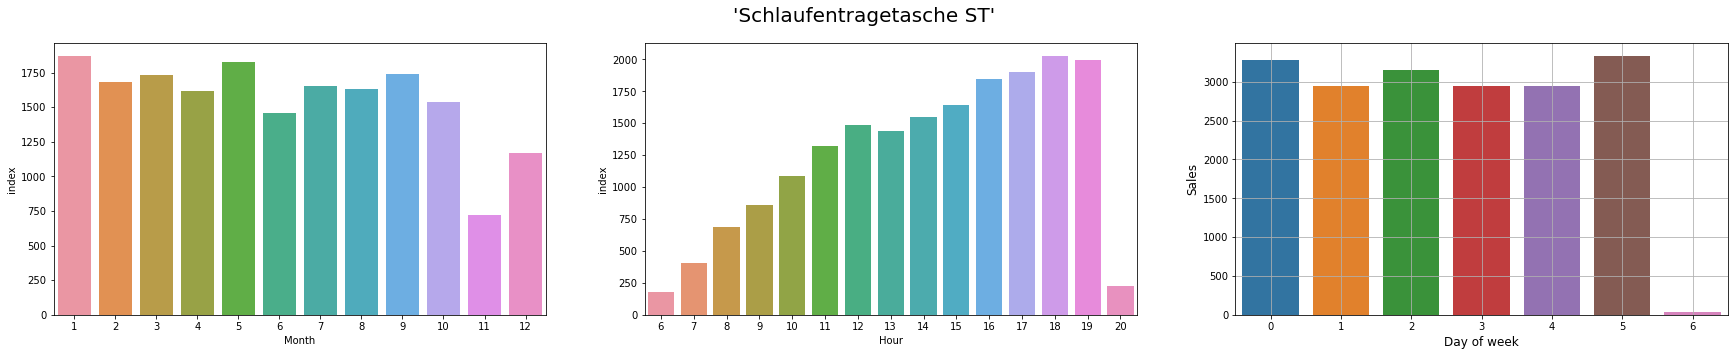

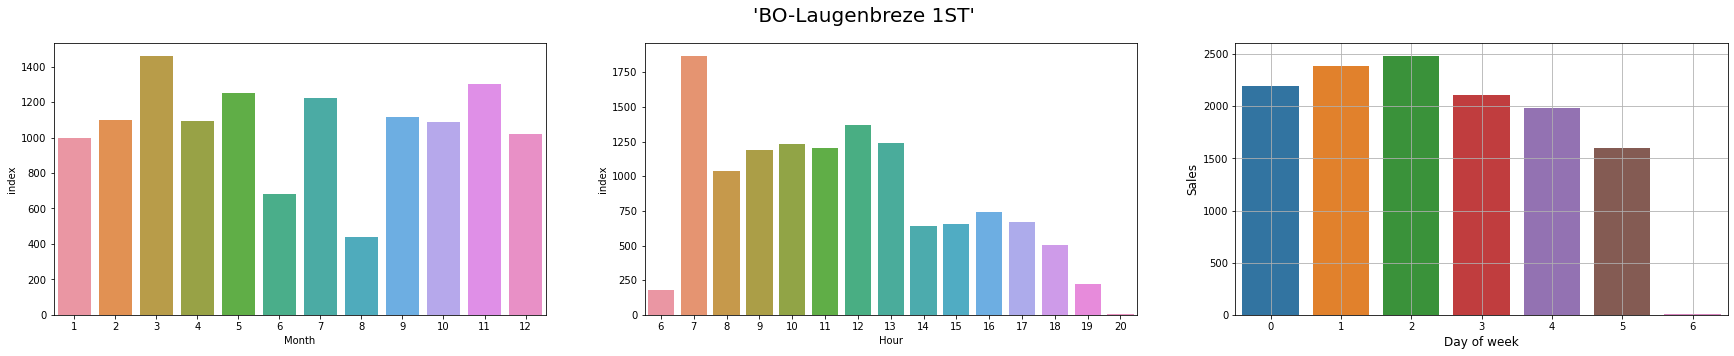

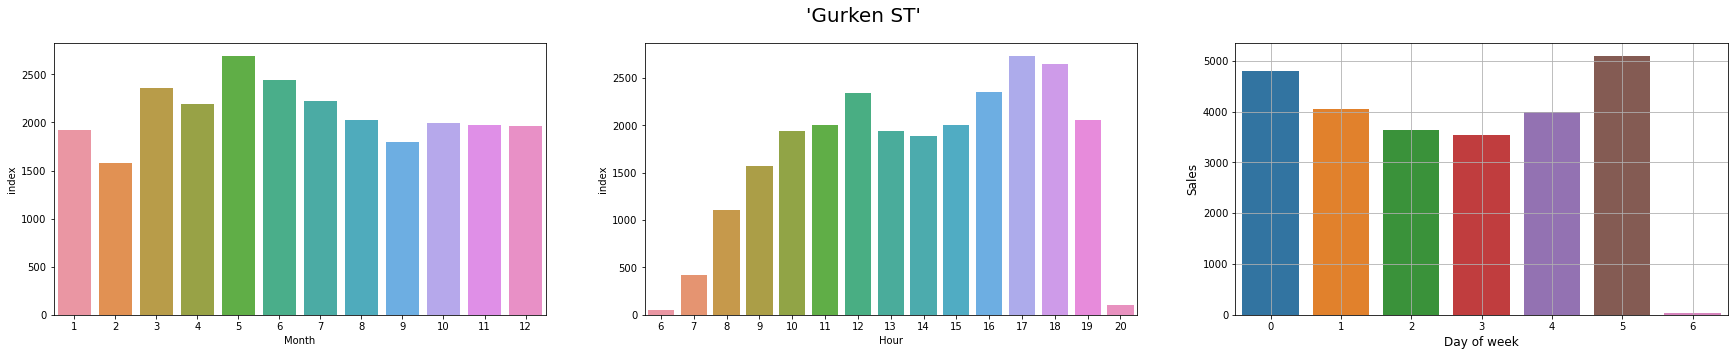

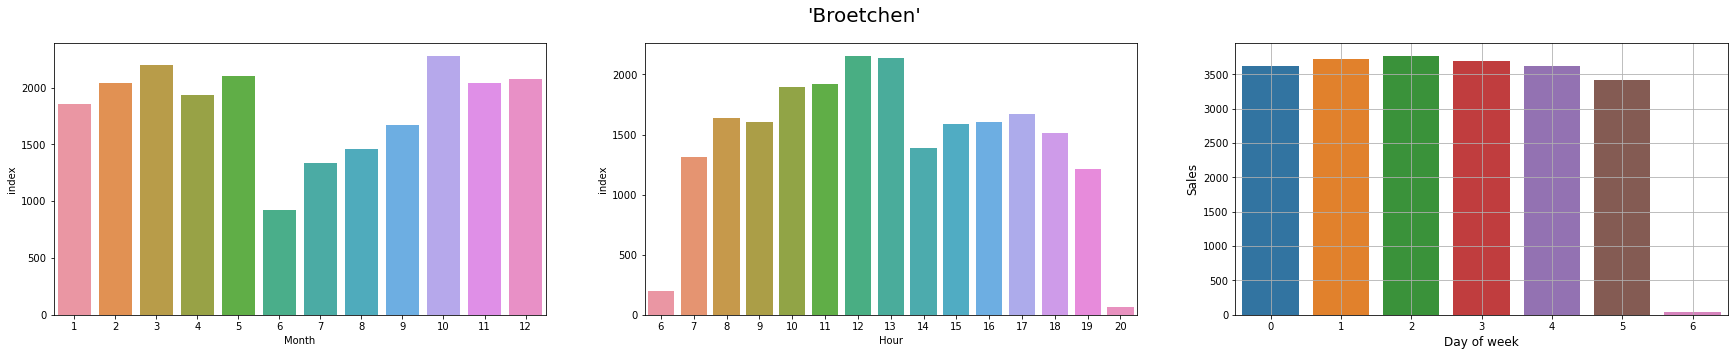

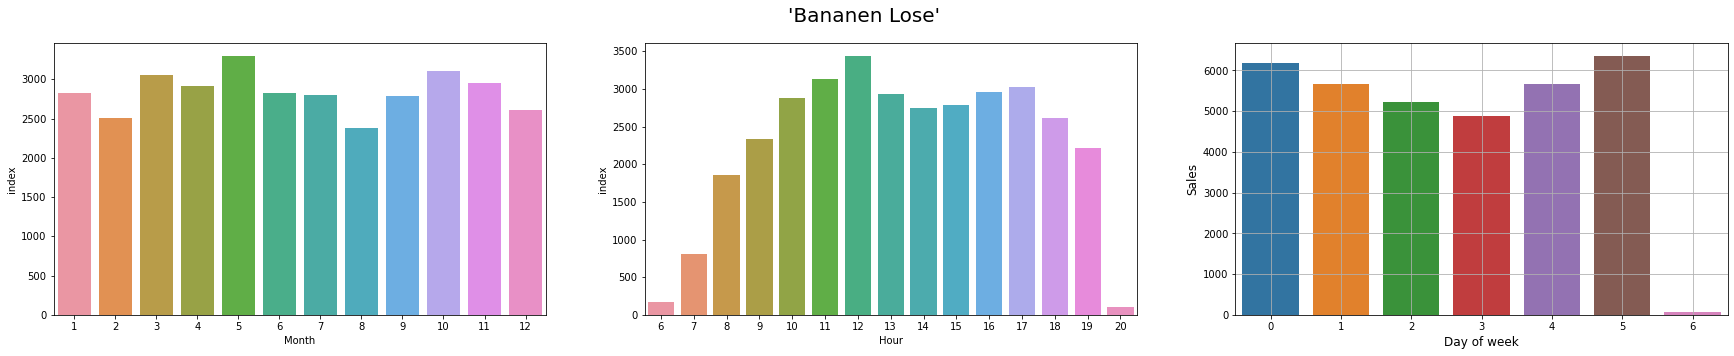

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for article_name in list(fre_1.Group.unique()):
    article = fre_1[(fre_1.Group == article_name) & (fre_1.StoreNumber==1223)].reset_index()
    fig, ax = plt.subplots(1,3, figsize=(30,5))
    plt.suptitle(f"'{article_name}'", fontsize=20)
    ## Monthly sales
    monthly_sales = article.groupby('Month').count()
    sns.barplot(
        y=monthly_sales['index'],
        x=monthly_sales.index,
        data=monthly_sales,
        ax=ax[0])
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Months', fontsize=12)
    # Hourly sales
    hourly_sales = article.groupby('Hour').count()
    sns.barplot(
        ax=ax[1],
        y=hourly_sales['index'],
        x=hourly_sales.index,
        data=hourly_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Hours', fontsize=12)
    plt.grid(True)
    # Daily sales
    daily_sales = article.groupby('Day').count()
    # if daily_sales.shape[0] == 6:
    #     daily_sales = daily_sales.append(pd.Series(), ignore_index=True)
    # daily_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.barplot(
        ax=ax[2],
        y=daily_sales['index'],
        x=daily_sales.index,
        data=daily_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Day of week', fontsize=12)
    plt.grid(True)
    # # maximum sales by Store
    # store_sales = article.groupby('StoreNumber').count()
    # sns.barplot(
    #     ax=ax[3],
    #     y=store_sales['index'],
    #     x=store_sales.index,
    #     data=store_sales)
    # plt.ylabel("Sales", fontsize=12)
    # plt.xlabel('Stores', fontsize=12)
    # plt.grid(True)


## second cluster

In [11]:
# integrate the identical transactions
integrated_2 = fre_2.groupby(['Date','StoreNumber', 'CashRegisterNumber', 'ReceiptNumber']).agg(Articles=('ArticleName', lambda x:';'.join(x.unique()))).reset_index()
display(integrated_2.head())

# spilt the integrated transactions into several columns
split_2 = integrated_2['Articles'].str.split(';', expand=True).dropna(how='all', axis=1)
display(split_2.head())

for i in range(split_2.shape[1]):
    mini_article = split_2[split_2.iloc[:,i].notnull()]
    print(f"Transactions contain at least {i+1} article and the frequency is {mini_article.shape[0]}")

# filter transactions with at least 3 articles
split_2 = split_2[split_2.iloc[:,2].notnull()]
display(split_2.head())

# convert DataFrame to List
# delete the NoneType
res = []
def filter_list(_list):
    for item in _list:
        res.append(list(filter(None, item)))
filter_list(split_2.values.tolist())

transactions_from_df = [tuple(row) for row in res]
transactions_from_df[0:3]

# apriori algorithm
from efficient_apriori import apriori
itemsets, rules = apriori(transactions_from_df, min_support=0.25, min_confidence=0.5)
print("itemsets:",itemsets)
print("rules", rules)

,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,Articles
0,2022-01-03,1001,1,302,Avocado vorgereift ST
1,2022-01-03,1001,1,303,VL Eier BH 10ST
2,2022-01-03,1001,2,2,M.I. Mozzarella oGt 125g
3,2022-01-03,1001,2,4,Avocado vorgereift ST;VL Eier BH 10ST ;GL Sahn...
4,2022-01-03,1001,2,25,M.I. Mozzarella oGt 125g


,0,1,2,3,4,5
0,Avocado vorgereift ST,None,None,None,None,None
1,VL Eier BH 10ST,None,None,None,None,None
2,M.I. Mozzarella oGt 125g,None,None,None,None,None
3,Avocado vorgereift ST,VL Eier BH 10ST,GL Sahne 30% 200g VLOG,None,None,None
4,M.I. Mozzarella oGt 125g,None,None,None,None,None


Transactions contain at least 1 article and the frequency is 484294
Transactions contain at least 2 article and the frequency is 46722
Transactions contain at least 3 article and the frequency is 3781
Transactions contain at least 4 article and the frequency is 238
Transactions contain at least 5 article and the frequency is 9
Transactions contain at least 6 article and the frequency is 1


,0,1,2,3,4,5
3,Avocado vorgereift ST,VL Eier BH 10ST,GL Sahne 30% 200g VLOG,None,None,None
125,M.I. Mozzarella oGt 125g,Avocado vorgereift ST,Kiwi Gruen ST,None,None,None
164,VL Eier BH 10ST,Avocado vorgereift ST,GL Sahne 30% 200g VLOG,None,None,None
316,"AugustinerHellMW1x0,5LFL",M.I. Mozzarella oGt 125g,GL Sahne 30% 200g VLOG,None,None,None
454,Zeitschriften 7%,M.I. Mozzarella oGt 125g,Kiwi Gruen ST,None,None,None


itemsets: {1: {('Avocado vorgereift ST',): 2013, ('VL Eier BH 10ST ',): 1812, ('GL Sahne 30% 200g VLOG',): 2121, ('M.I. Mozzarella oGt 125g',): 2139, ('Kiwi Gruen ST',): 1549, ('Zeitschriften 7%',): 1096}, 2: {('Avocado vorgereift ST', 'M.I. Mozzarella oGt 125g'): 1125, ('GL Sahne 30% 200g VLOG', 'M.I. Mozzarella oGt 125g'): 1134, ('GL Sahne 30% 200g VLOG', 'VL Eier BH 10ST '): 949}}
rules [{M.I. Mozzarella oGt 125g} -> {Avocado vorgereift ST}, {Avocado vorgereift ST} -> {M.I. Mozzarella oGt 125g}, {M.I. Mozzarella oGt 125g} -> {GL Sahne 30% 200g VLOG}, {GL Sahne 30% 200g VLOG} -> {M.I. Mozzarella oGt 125g}, {VL Eier BH 10ST } -> {GL Sahne 30% 200g VLOG}]


## Analysis on the second-cluster articles that are not showed in the rule associations
### 'Avocado vorgereift ST'
### 'VL Eier BH 10ST '
### 'M.I. Mozzarella oGt 125g'
### 'GL Sahne 30% 200g VLOG'
### 'Zeitschriften 7%'
### 'Kiwi Gruen ST'
### 'AugustinerHellMW1x0,5LFL'
### 'SammelNr. Lose Backwaren'

In [12]:
counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "Zeitschriften 7%"].shape[0]
print("Zeitschriften 7%", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "Kiwi Gruen ST"].shape[0]
print("Kiwi Gruen ST", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "AugustinerHellMW1x0,5LFL"].shape[0]
print("AugustinerHellMW1x0,5LFL", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "SammelNr. Lose Backwaren"].shape[0]
print("SammelNr. Lose Backwaren", counts)


for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "Avocado vorgereift ST"].shape[0]
print("Avocado vorgereift ST", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "VL Eier BH 10ST "].shape[0]
print("VL Eier BH 10ST ", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "M.I. Mozzarella oGt 125g"].shape[0]
print("M.I. Mozzarella oGt 125g", counts)

counts = 0
for i in range(5):
    counts += split_2[split_2.iloc[:,i] == "GL Sahne 30% 200g VLOG"].shape[0]
print("GL Sahne 30% 200g VLOG", counts)

Zeitschriften 7% 1095
Kiwi Gruen ST 1549
AugustinerHellMW1x0,5LFL 217
SammelNr. Lose Backwaren 644
Avocado vorgereift ST 2657
VL Eier BH 10ST  1812
M.I. Mozzarella oGt 125g 2139
GL Sahne 30% 200g VLOG 2121


In [13]:
print("Zeitschriften 7%:", integrated_2[integrated_2.Articles.str.contains("Zeitschriften 7%")].shape[0], integrated_2[integrated_2.Articles == "Zeitschriften 7%"].shape[0])
print("Kiwi Gruen ST:", integrated_2[integrated_2.Articles.str.contains("Kiwi Gruen ST")].shape[0], integrated_2[integrated_2.Articles == "Kiwi Gruen ST"].shape[0])
print("AugustinerHellMW1x0,5LFL:", integrated_2[integrated_2.Articles.str.contains("AugustinerHellMW1x0,5LFL")].shape[0], integrated_2[integrated_2.Articles == "AugustinerHellMW1x0,5LFL"].shape[0])
print("SammelNr. Lose Backwaren:", integrated_2[integrated_2.Articles.str.contains("SammelNr. Lose Backwaren")].shape[0], integrated_2[integrated_2.Articles == "SammelNr. Lose Backwaren"].shape[0])
print("Avocado vorgereift ST:", integrated_2[integrated_2.Articles.str.contains("Avocado vorgereift ST")].shape[0], integrated_2[integrated_2.Articles == "Avocado vorgereift ST"].shape[0])
print("VL Eier BH 10ST :", integrated_2[integrated_2.Articles.str.contains("VL Eier BH 10ST ")].shape[0], integrated_2[integrated_2.Articles == "VL Eier BH 10ST "].shape[0])
print("M.I. Mozzarella oGt 125g:", integrated_2[integrated_2.Articles.str.contains("M.I. Mozzarella oGt 125g")].shape[0], integrated_2[integrated_2.Articles == "M.I. Mozzarella oGt 125g"].shape[0])
print("GL Sahne 30% 200g VLOG:", integrated_2[integrated_2.Articles.str.contains("GL Sahne 30% 200g VLOG")].shape[0], integrated_2[integrated_2.Articles == "GL Sahne 30% 200g VLOG"].shape[0])

Zeitschriften 7%: 96687 84451
Kiwi Gruen ST: 38797 28692
AugustinerHellMW1x0,5LFL: 30512 28104
SammelNr. Lose Backwaren: 49962 42570
Avocado vorgereift ST: 83477 66884
VL Eier BH 10ST : 97537 81234
M.I. Mozzarella oGt 125g: 66269 50368
GL Sahne 30% 200g VLOG: 71804 55269


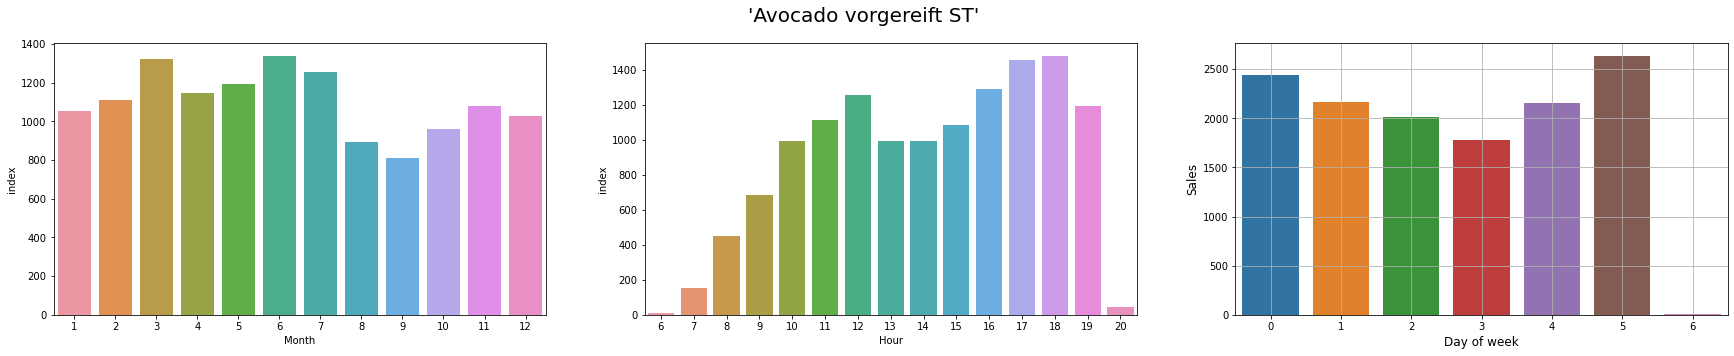

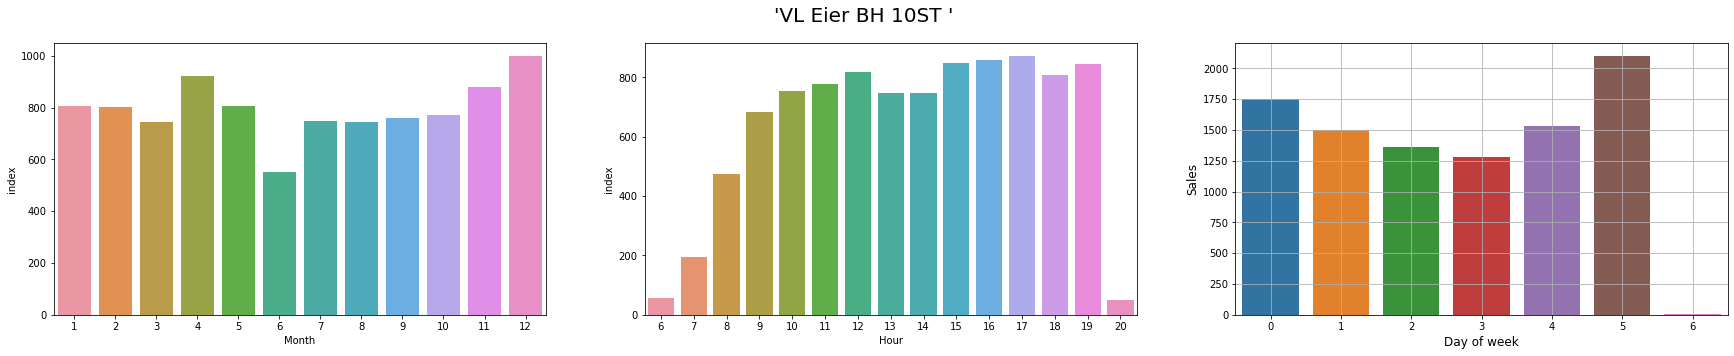

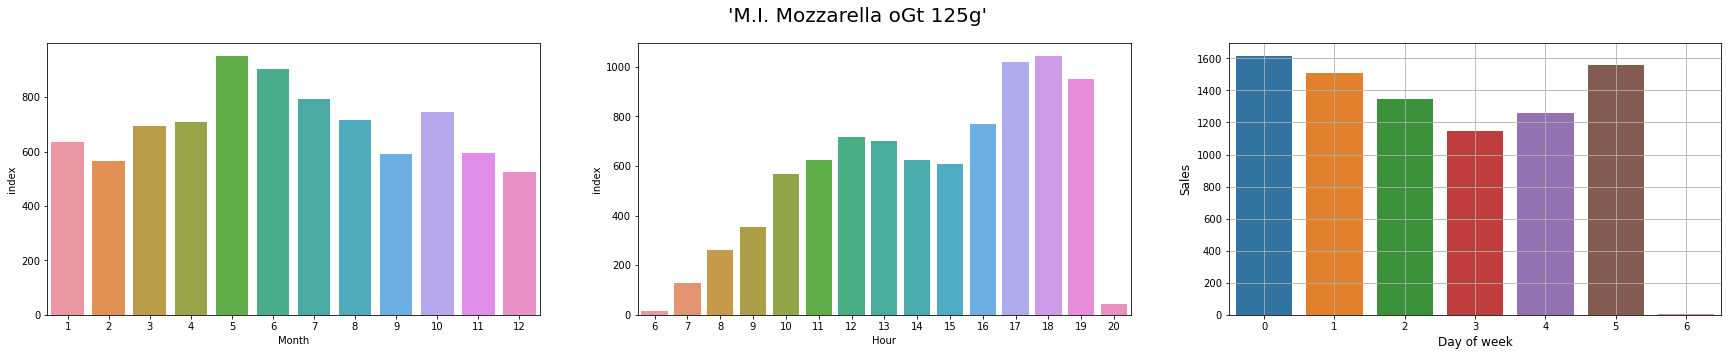

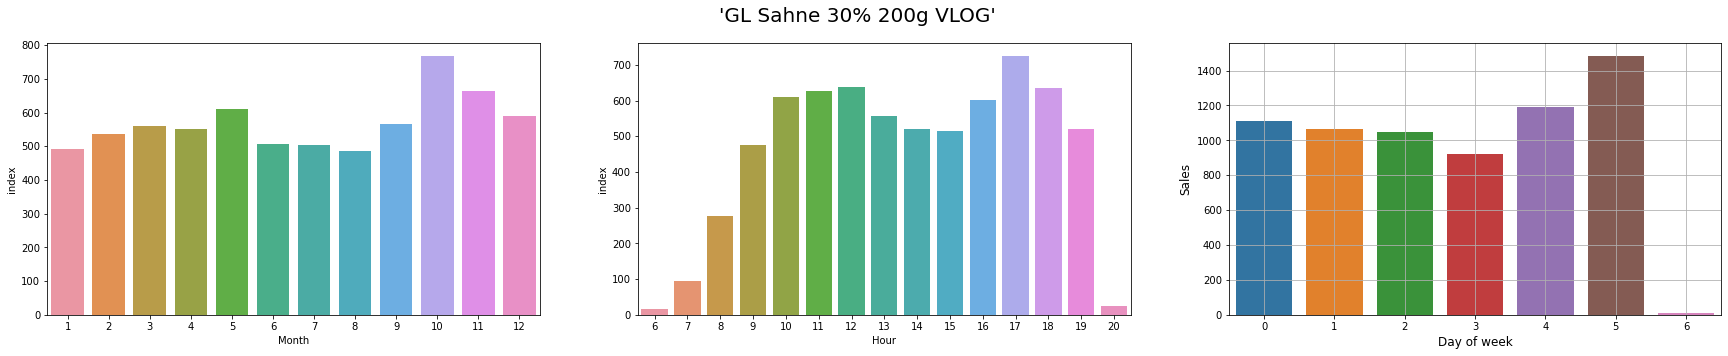

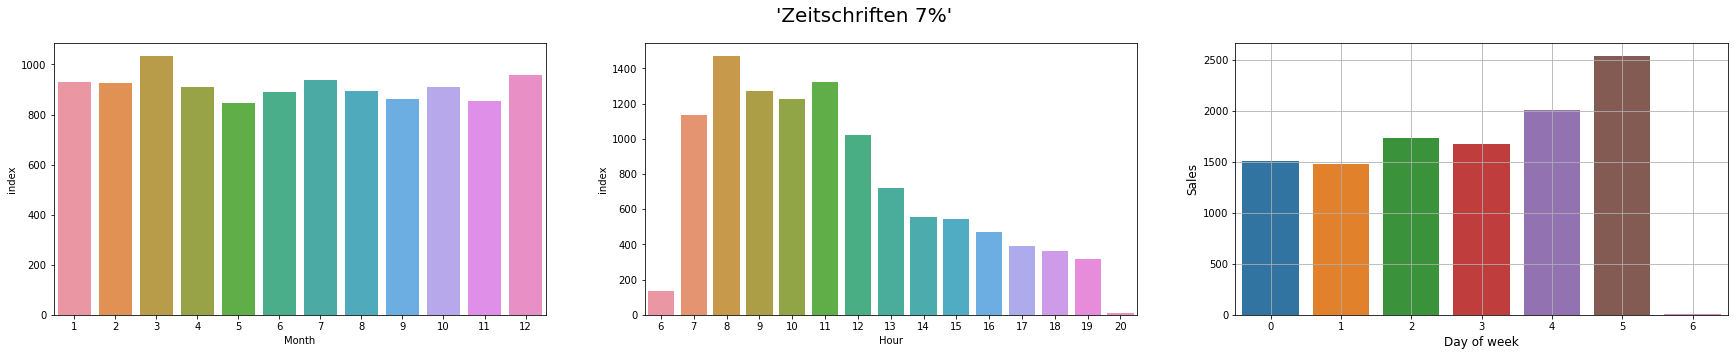

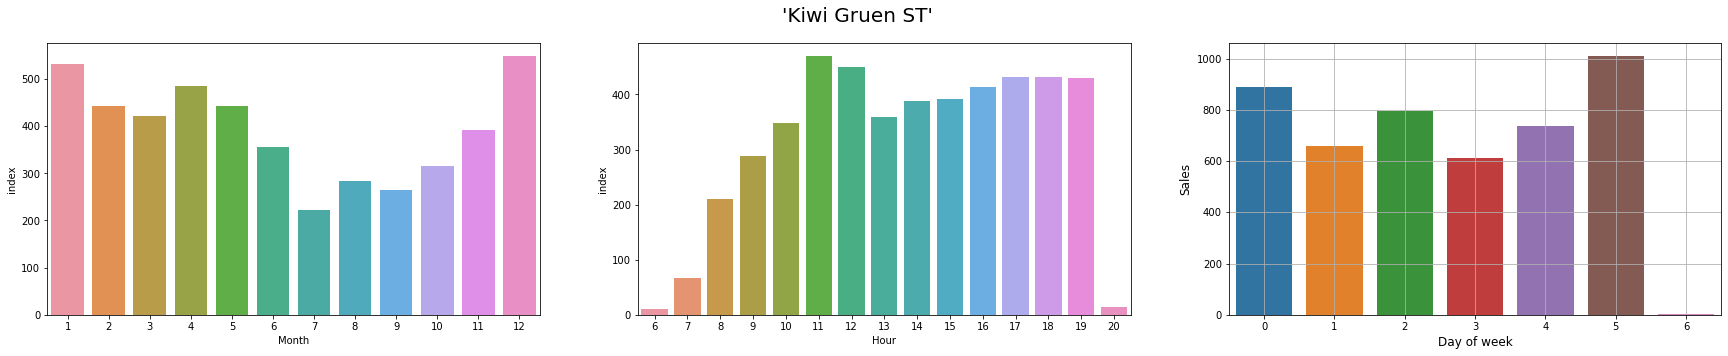

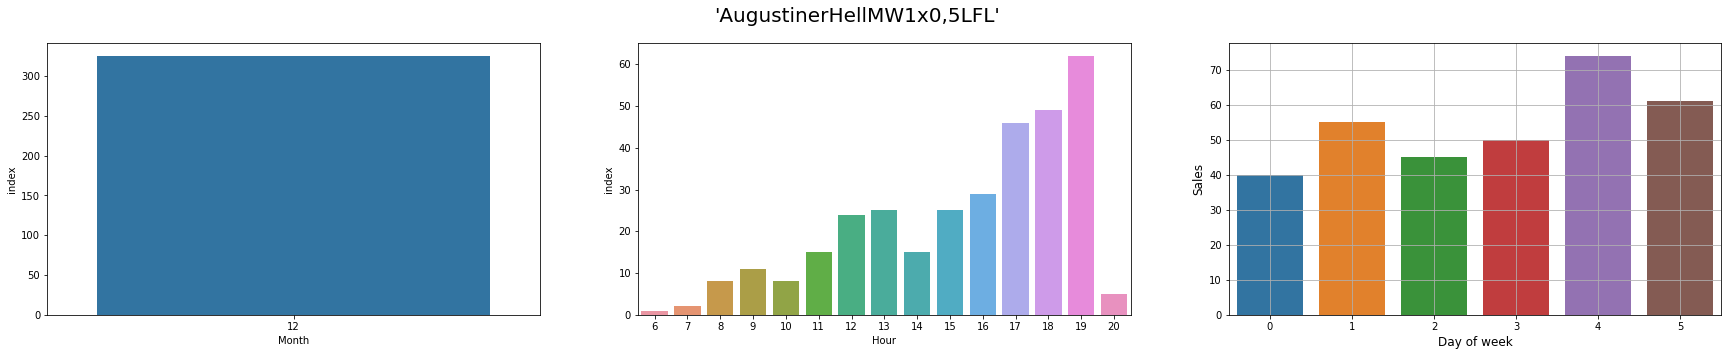

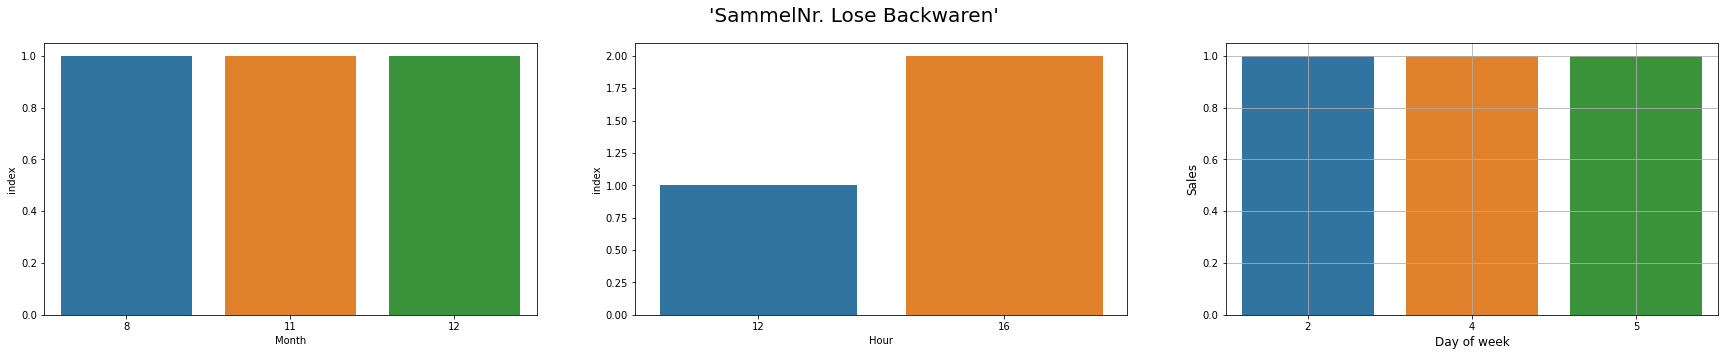

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for article_name in list(fre_2.Group.unique()):
    article = fre_2[(fre_2.Group == article_name) & (fre_2.StoreNumber==1223)].reset_index()
    fig, ax = plt.subplots(1,3, figsize=(30,5))
    plt.suptitle(f"'{article_name}'", fontsize=20)
    ## Monthly sales
    monthly_sales = article.groupby('Month').count()
    sns.barplot(
        y=monthly_sales['index'],
        x=monthly_sales.index,
        data=monthly_sales,
        ax=ax[0])
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Months', fontsize=12)
    # Hourly sales
    hourly_sales = article.groupby('Hour').count()
    sns.barplot(
        ax=ax[1],
        y=hourly_sales['index'],
        x=hourly_sales.index,
        data=hourly_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Hours', fontsize=12)
    plt.grid(True)
    # Daily sales
    daily_sales = article.groupby('Day').count()
    # if daily_sales.shape[0] == 6:
    #     daily_sales = daily_sales.append(pd.Series(), ignore_index=True)
    # daily_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.barplot(
        ax=ax[2],
        y=daily_sales['index'],
        x=daily_sales.index,
        data=daily_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Day of week', fontsize=12)
    plt.grid(True)
    # # maximum sales by Store
    # store_sales = article.groupby('StoreNumber').count()
    # sns.barplot(
    #     ax=ax[3],
    #     y=store_sales['index'],
    #     x=store_sales.index,
    #     data=store_sales)
    # plt.ylabel("Sales", fontsize=12)
    # plt.xlabel('Stores', fontsize=12)
    # plt.grid(True)
